<a href="https://colab.research.google.com/github/Jyotishmoy12/MachineLearning/blob/main/estimationandbalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted SoC Values Before Balancing:
 [1.30350795 0.54848195 1.41911627 1.83849295 0.52754462 1.13501807
 1.14952437 1.12645507 0.47208725 1.80868707 0.87260142 1.62696732
 1.35095845 0.62680693 1.55797397 0.78302577 1.67842828 1.13668705
 1.67641386 1.32457503 1.39629796 0.97992714 1.82743692 1.24476384
 0.84439752 1.16595005 0.08231326 0.62673995 1.26429236 0.59055367
 1.20431593 0.85276506 0.31821438 0.61661114 1.10250326 1.14445412
 1.12308253 1.26528005 1.26608764 0.85768471 1.69828122 0.7471025
 0.86168555 1.70987701 1.53379684 1.36507787 0.23831102 1.75051386
 1.37326566 1.88174456 0.33907724 1.64750369 0.36300632 1.18146337
 0.27266128 1.62023486 1.54559165 1.10873739 0.79789241 0.1805135
 1.34850119 0.89148806 1.39907637 1.63485809 1.83754419 1.6251372
 0.08951742 0.71733652 1.4063871  0.3699081  1.00934113 0.15293833
 0.43390848 0.08245434 1.52842171 0.46018922 0.67600186 1.74116756
 1.3455911  0.10539119 0.3628058  1.19404573 1.1061077  0.51127703
 1.77590886 1.18522917 1.

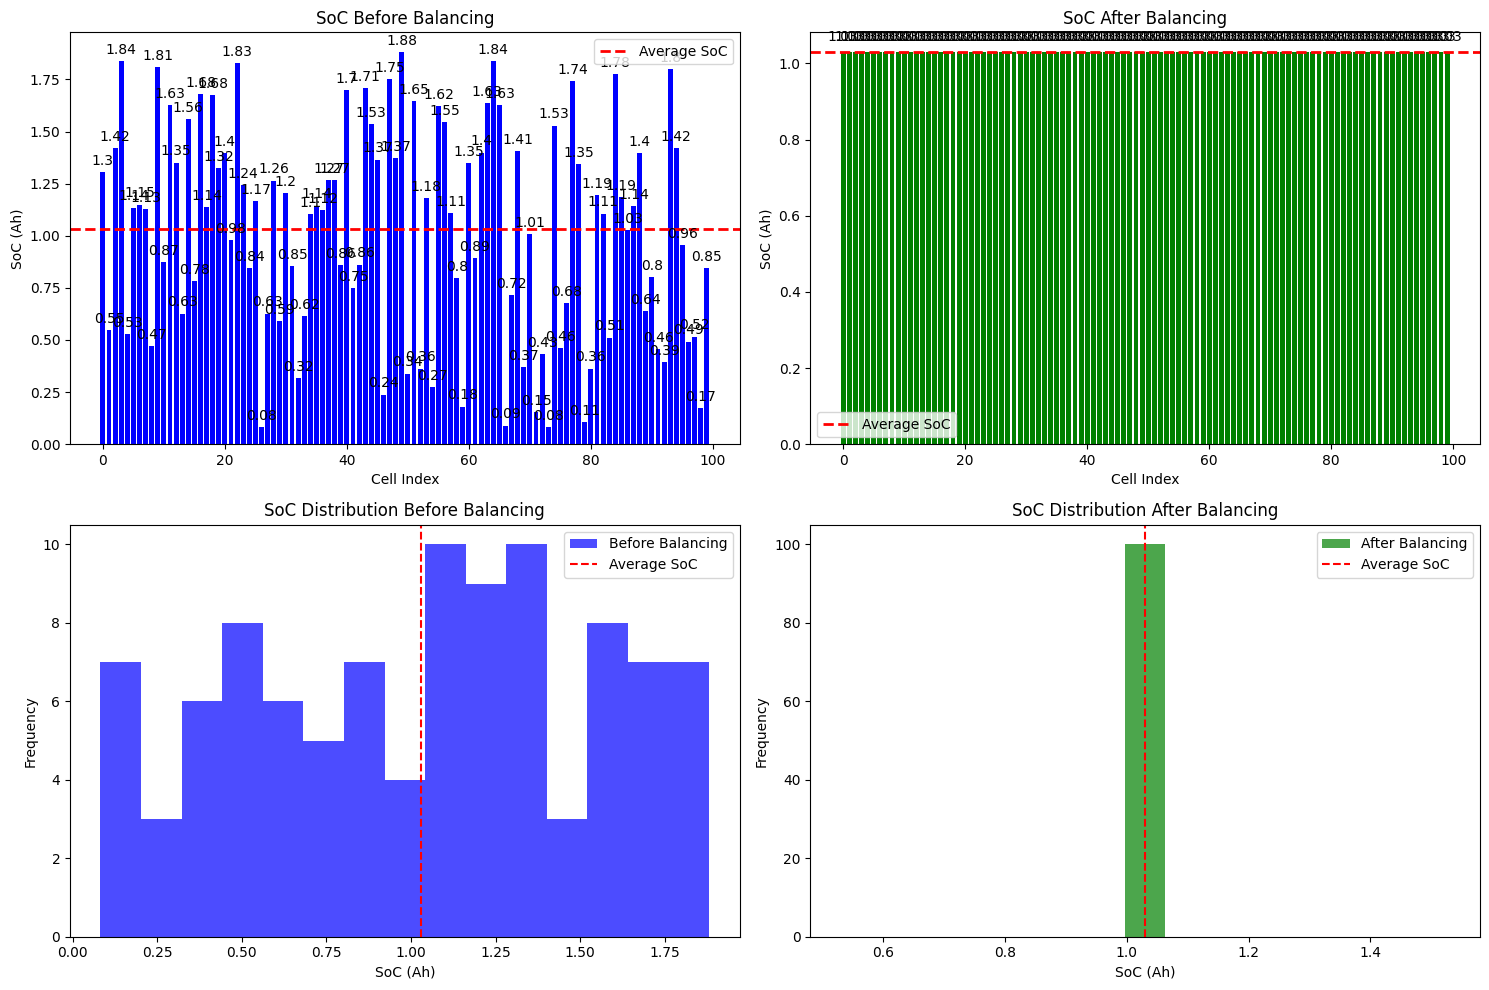

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Example Data for Multiple Battery Cells
def generate_battery_data(num_cells):
    np.random.seed(0)  # For reproducibility
    voltage = np.random.uniform(3.5, 4.2, num_cells)  # Voltage in Volts
    current = np.random.uniform(0.1, 5.0, num_cells)  # Current in Amperes
    discharge_capacity = np.random.uniform(0.5, 2.0, num_cells)  # Discharge Capacity in Ah
    charge_energy = np.random.uniform(1.0, 10.0, num_cells)  # Charge Energy in Wh
    discharge_energy = np.random.uniform(1.0, 10.0, num_cells)  # Discharge Energy in Wh

    # Assume Charge Capacity is derived from Voltage and Current
    charge_capacity = (voltage * current) / 10  # Simple derived capacity in Ah

    return np.column_stack((voltage, current, discharge_capacity, charge_energy, discharge_energy, charge_capacity))

# Step 2: Predict State of Charge (SoC) using Linear Regression
def predict_soc(X, W, b):
    return np.dot(X, W) + b

# Step 3: Linear Regression Parameters
def linear_regression(X, y, learning_rate=0.01, iterations=1000):
    num_features = X.shape[1]
    W = np.zeros(num_features)
    b = 0

    for _ in range(iterations):
        y_pred = predict_soc(X, W, b)

        # Calculate error
        error = y_pred - y

        # Calculate gradients
        gradient_W = (1 / len(y)) * np.dot(X.T, error)
        gradient_b = (1 / len(y)) * np.sum(error)

        # Update weights and bias
        W -= learning_rate * gradient_W
        b -= learning_rate * gradient_b

    return W, b

# Step 4: Balance the State of Charge (SoC)
def balance_soc(soc_values):
    average_soc = np.mean(soc_values)
    balanced_soc = np.full_like(soc_values, average_soc)  # Set all values to average
    return balanced_soc

# Step 5: Visualize SoC Before and After Balancing
def visualize_soc(before, after, average):
    plt.figure(figsize=(15, 10))

    # Bar chart for SoC before balancing
    plt.subplot(2, 2, 1)
    bars = plt.bar(range(len(before)), before, color='blue')
    plt.axhline(y=average, color='red', linestyle='--', label='Average SoC', linewidth=2)
    plt.title('SoC Before Balancing')
    plt.xlabel('Cell Index')
    plt.ylabel('SoC (Ah)')
    plt.legend()

    # Add labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

    # Bar chart for SoC after balancing
    plt.subplot(2, 2, 2)
    bars_after = plt.bar(range(len(after)), after, color='green')
    plt.axhline(y=average, color='red', linestyle='--', label='Average SoC', linewidth=2)
    plt.title('SoC After Balancing')
    plt.xlabel('Cell Index')
    plt.ylabel('SoC (Ah)')
    plt.legend()

    # Add labels on top of bars
    for bar in bars_after:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

    # Histogram of SoC distribution before balancing
    plt.subplot(2, 2, 3)
    plt.hist(before, bins=15, color='blue', alpha=0.7, label='Before Balancing')
    plt.axvline(x=average, color='red', linestyle='--', label='Average SoC')
    plt.title('SoC Distribution Before Balancing')
    plt.xlabel('SoC (Ah)')
    plt.ylabel('Frequency')
    plt.legend()

    # Histogram of SoC distribution after balancing
    plt.subplot(2, 2, 4)
    plt.hist(after, bins=15, color='green', alpha=0.7, label='After Balancing')
    plt.axvline(x=average, color='red', linestyle='--', label='Average SoC')
    plt.title('SoC Distribution After Balancing')
    plt.xlabel('SoC (Ah)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main Execution
num_cells = 100  # Number of battery cells
battery_data = generate_battery_data(num_cells)  # Generate battery data
X = battery_data[:, :5]  # Features: Voltage, Current, Discharge Capacity, Charge Energy, Discharge Energy
y = battery_data[:, 5]   # Target: Charge Capacity (SoC)

# Step 6: Train the linear regression model
optimal_weights, optimal_bias = linear_regression(X, y)

# Step 7: Predict the SoC for each cell
predicted_soc = predict_soc(X, optimal_weights, optimal_bias)

# Step 8: Balance the SoC among the cells
balanced_soc = balance_soc(predicted_soc)

# Calculate average SoC for visualization
average_soc = np.mean(predicted_soc)

# Show predicted SoC values before and after balancing
print("Predicted SoC Values Before Balancing:\n", predicted_soc)
print("\nBalanced SoC Values After Balancing:\n", balanced_soc)

# Visualize SoC before and after balancing
visualize_soc(predicted_soc, balanced_soc, average_soc)
